In [1]:
import pandas as pd 

In [2]:
#한국 거래소(KRX) 종목 가져오기
#링크로 부터 한국 거래소 목록을 엑셀로 다운로드
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#데이터 정렬
stock_code.sort_values(['상장일'], ascending=True)
#회사명과 종목코드 이외의 column 제외
stock_code = stock_code[['회사명', '종목코드']] 
#한글 column명을 영어로 변경
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'})
#종목코드 6자리에 맞추어 설정
stock_code.code = stock_code.code.map('{:06d}'.format)

In [3]:
import pandas as pd
import requests
#네이버 금융에서 주식데이터 가져오기

#삼성전자의 일별 시세 url 가져오기
company='삼성전자' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
page = 1

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
url = '{url}&page={page}'.format(url=url, page=page)
print(url)
#user agent 변경으로 네이버 크롤링 데이터에 접근
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36'}  
res = requests.get(url,headers=header)
df = pd.read_html(res.text, header=0)[0]
df.head()


http://finance.naver.com/item/sise_day.nhn?code=005930&page=1


날짜       종가    전일비       시가       고가       저가         거래량
0         NaN      NaN    NaN      NaN      NaN      NaN         NaN
1  2021.10.18  69400.0  700.0  70200.0  70200.0  69300.0   3855339.0
2  2021.10.15  70100.0  700.0  70200.0  71000.0  70000.0  18051612.0
3  2021.10.14  69400.0  600.0  69000.0  69800.0  68800.0  19520641.0
4  2021.10.13  68800.0  200.0  68700.0  69600.0  68300.0  24172015.0

In [4]:
#삼성전자에 대해서 page를 반복하여 20page까지의 데이터 가져오기
import requests
company='삼성전자' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거

df = pd.DataFrame()
for page in range(1,20):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    print(url)
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36'}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0], ignore_index=True)


http://finance.naver.com/item/sise_day.nhn?code=005930&page=1
http://finance.naver.com/item/sise_day.nhn?code=005930&page=2
http://finance.naver.com/item/sise_day.nhn?code=005930&page=3
http://finance.naver.com/item/sise_day.nhn?code=005930&page=4
http://finance.naver.com/item/sise_day.nhn?code=005930&page=5
http://finance.naver.com/item/sise_day.nhn?code=005930&page=6
http://finance.naver.com/item/sise_day.nhn?code=005930&page=7
http://finance.naver.com/item/sise_day.nhn?code=005930&page=8
http://finance.naver.com/item/sise_day.nhn?code=005930&page=9
http://finance.naver.com/item/sise_day.nhn?code=005930&page=10
http://finance.naver.com/item/sise_day.nhn?code=005930&page=11
http://finance.naver.com/item/sise_day.nhn?code=005930&page=12
http://finance.naver.com/item/sise_day.nhn?code=005930&page=13
http://finance.naver.com/item/sise_day.nhn?code=005930&page=14
http://finance.naver.com/item/sise_day.nhn?code=005930&page=15
http://finance.naver.com/item/sise_day.nhn?code=005930&page=16
h

In [14]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df.head(20)

date  close  diff   open   high    low    volume
283 2021-01-11  91000  2200  90000  96800  89500  90306177
282 2021-01-12  90600   400  90300  91400  87800  48682416
281 2021-01-13  89700   900  89800  91200  89100  36068848
280 2021-01-14  89700     0  88700  90000  88700  26393970
279 2021-01-15  88000  1700  89800  91800  88000  33431809
275 2021-01-18  85000  3000  86600  87300  84100  43227951
274 2021-01-19  87000  2000  84500  88000  83600  39895044
273 2021-01-20  87200   200  89000  89000  86500  25211127
272 2021-01-21  88100   900  87500  88600  86500  25318011
271 2021-01-22  86800  1300  89000  89700  86800  30861661
268 2021-01-25  89400  2600  87000  89900  86300  27258534
267 2021-01-26  86700  2700  88800  89200  86500  33178936
266 2021-01-27  85600  1100  86600  87700  85600  26423070
265 2021-01-28  83700  1900  83200  85600  83200  31859808
264 2021-01-29  82000  1700  84500  85000  82000  39615978
260 2021-02-01  83000  1000  81700  83400  81000  28046832
259 2021-02-02  84400  1400  84100  86400  83700  26302077
258 2021-02-03  84600   200  84800  85400  83400  22112205
257 2021-02-04  82500  2100  83500  83800  82100  24171688
256 2021-02-05  83500  1000  83100  84000  82500  18036835

In [5]:
!pip install plotly

In [15]:
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px
#%matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

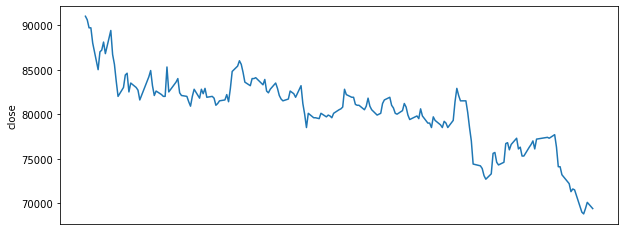

In [16]:
#그래프 생성
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('')
plt.ylabel('close')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#plt.savefig(company + ".png")
plt.show()

In [17]:
#그래프 생성
fig = px.line(df, x='date', y='close', title='{}의 종가(close) Time Series'.format(company))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [12]:
#html형식으로 그래프 저장
fig.write_html("file.html")